In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
server = "DESKTOP-1IJSSIA\JAY"
database = "Jay_Grocery"

connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = create_engine(connection_string)

In [3]:
query = """
select ci.CityName, co.CountryName, cu.CustomerID, concat(cu.FirstName, ' ', cu.LastName) as CustomerName,
concat(em.Employee_FirstName, ' ', em.Employee_LastName) as EmployeeName, em.Employee_Gender, pr.ProductName, pr.price,
pr.class, pr.resistant, pr.IsAllergic, pr.VitalityDays, s.SalesPersonID, s.Quantity, s.Discount,
s.Transaction_number
from countries co
inner join cities ci
on co.CountryID = ci.CountryID
inner join customers cu
on ci.CityID = cu.CityID
inner join employee em
on ci.CityID = em.CityID
inner join sales s
on cu.CustomerID = s.CustomerID
inner join products pr
on s.ProductID = pr.ProductID
"""
df = pd.read_sql(query, engine)

DATA EXPLORATION

In [4]:
df.head()

,CityName,CountryName,CustomerID,CustomerName,EmployeeName,Employee_Gender,ProductName,price,class,resistant,IsAllergic,VitalityDays,SalesPersonID,Quantity,Discount,Transaction_number
0,Albuquerque,United States,27039,Susan Green,Bernard Moody,M,Vaccum Bag 10x13,44.2337,High,Unknown,Unknown,41\r,6,7,0.0,FQL4S94E4ME1EZFTG42G
1,Baltimore,United States,12687,Whitney Sullivan,Holly Collins,M,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0\r,3,4,0.2,6X9MOQIJH92NIK81BG0K
2,Baltimore,United States,12687,Whitney Sullivan,Devon Brewer,M,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0\r,3,4,0.2,6X9MOQIJH92NIK81BG0K
3,Anchorage,United States,67670,Rosemary Webb,Katina Marks,M,Pastry - Raisin Muffin - Mini,0.4278,Medium,Durable,TRUE,0\r,5,18,0.2,Z2WDS9TJXLAO1GY0N24I
4,Fremont,United States,19310,Nicholas Murillo,Christine Palmer,F,Wine - Toasted Head,39.8545,High,Weak,TRUE,0\r,19,5,0.0,E2JF4LIQNYTDKDBGMJS0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251622 entries, 0 to 251621
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CityName            251622 non-null  object 
 1   CountryName         251622 non-null  object 
 2   CustomerID          251622 non-null  int64  
 3   CustomerName        251622 non-null  object 
 4   EmployeeName        251622 non-null  object 
 5   Employee_Gender     251622 non-null  object 
 6   ProductName         251622 non-null  object 
 7   price               251622 non-null  float64
 8   class               251622 non-null  object 
 9   resistant           251622 non-null  object 
 10  IsAllergic          251622 non-null  object 
 11  VitalityDays        251622 non-null  object 
 12  SalesPersonID       251622 non-null  int64  
 13  Quantity            251622 non-null  int64  
 14  Discount            251622 non-null  float64
 15  Transaction_number  251622 non-nul

In [6]:
df.describe()

,CustomerID,price,SalesPersonID,Quantity,Discount
count,251622.000000,251622.000000,251622.000000,251622.000000,251622.000000
mean,49522.076555,50.842195,12.020650,13.038164,0.030083
std,28486.483753,28.536509,6.626974,7.199959,0.064097
min,7.000000,0.044900,1.000000,1.000000,0.000000
25%,24730.000000,26.577600,6.000000,7.000000,0.000000
50%,49482.000000,52.636700,12.000000,13.000000,0.000000
75%,73898.000000,75.248600,18.000000,19.000000,0.000000
max,98742.000000,99.875500,23.000000,25.000000,0.200000


In [7]:
df['VitalityDays'] = df['VitalityDays'].str.replace('/r', '', regex=False).astype(int)

In [8]:
df.duplicated().sum().sum()

np.int64(0)

In [9]:
df.isnull().sum().sum()

np.int64(0)

-EXPLORATORY REPORT

-Dataframe consist of 16 columns and 251622 rows
-Data types are 11 objects, 3 integers and 2 float numbers

-COLUMN DESCRIBTIONS
-CustomerID:
we have 251622 rows of non missing data
IDs are sequential identifiers and do not have business meaning
Customer with the unique identifier 7 is the least customer that bought from us in this sales data. this raises the question of where are customer id 1 to 6 and why haven't they bought from us
And the customer with identifier 98742 is the highest identifier in our sales data and this raises question for the remaining missing customers that havent bought from us

-Price:
we have 251622 rows of non missing data
On average, product costs around 50.84
Standard deviation is giving 28.54, which means most prices of products are scattered around 22.3 to 79.38. Information can be used as promotional strategy
Minimum price is 0.045, given it non significance, this can be an error or a product that cant be bought per unit and requires large bulk purchase.
25% of the products bought fall below 26.58
median price is 52.64 indicating most product bought are around this price
75% of the product fall below 75.25
And the highest unit price of this sales data is 99.88

-SalesPersonID:
we have 251622 rows of non missing data
Although we have a total of 23 employees, mean of this dataset is 12 and the standard deviation is 6 with means most of our employees that are present in this sales data fall between 6 and 18 and also given the minimum identifier integer for employee is 1 and the maximum is 23, it looks like most of our employees participated in the sales

-Quantity
we have 251622 rows of non missing data
The mean is 13 and standard deviation is 7 which means most quantity bought is around 6 to 20, but we dont know which of the product is bought the most till we do further analysis
The minimum quantity bought is 1 unit and maximum is 25

-Discount
we have 251622 rows of non missing data
75% of data has 0 discount, the highest amount of discount is 20 and most sales has no discount.

-IMPORTANT NOTE
There is no sign of duplicated or null values in the data

In [10]:
df.head()

,CityName,CountryName,CustomerID,CustomerName,EmployeeName,Employee_Gender,ProductName,price,class,resistant,IsAllergic,VitalityDays,SalesPersonID,Quantity,Discount,Transaction_number
0,Albuquerque,United States,27039,Susan Green,Bernard Moody,M,Vaccum Bag 10x13,44.2337,High,Unknown,Unknown,41,6,7,0.0,FQL4S94E4ME1EZFTG42G
1,Baltimore,United States,12687,Whitney Sullivan,Holly Collins,M,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0,3,4,0.2,6X9MOQIJH92NIK81BG0K
2,Baltimore,United States,12687,Whitney Sullivan,Devon Brewer,M,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0,3,4,0.2,6X9MOQIJH92NIK81BG0K
3,Anchorage,United States,67670,Rosemary Webb,Katina Marks,M,Pastry - Raisin Muffin - Mini,0.4278,Medium,Durable,TRUE,0,5,18,0.2,Z2WDS9TJXLAO1GY0N24I
4,Fremont,United States,19310,Nicholas Murillo,Christine Palmer,F,Wine - Toasted Head,39.8545,High,Weak,TRUE,0,19,5,0.0,E2JF4LIQNYTDKDBGMJS0


In [12]:
df['CityName'].nunique()

18

In [13]:
dfc = df.CityName.value_counts().reset_index()
dfc.columns = ['CityName', 'count']

In [14]:
import plotly.express as px

fig = px.bar(
    dfc,
    x="CityName",
    y='count',
    title='Cities & Sales Made',
    text='count'
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

Lubbock having the highest number of sales (31539) & Atlanta having the lowest number of sales (10302)

In [15]:
dfcus = df['CustomerName'].value_counts().reset_index()
dfcus.columns = ['CustomerName', 'count']

In [16]:
fig = px.bar(
    dfcus.head(10),
    x="CustomerName",
    y='count',
    title="Top 10 Customers",
    text='count'
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

Alberto Lamb and Bryce Mc Bride being our most valuable customers. This shows strong retention.

In [17]:
fig = px.bar(
    dfcus.tail(10),
    x="CustomerName",
    y='count',
    title="Last 10 Customers",
    text='count'
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

Jane Blackburn, John Mcintosh and Wade Brennan buying just one product each

In [18]:
fig = px.scatter(
    df,
    x="price",
    y="Quantity",
    title="Scatter Plot of Price vs Quantity",
    opacity=0.3,
    width=900,
    height=600
)
fig.show()

Customer Purchases are random, They are not linear

In [19]:
df['Revenue'] = df['price'] * df['Quantity'] * (1-df['Discount'])

In [20]:
df.Revenue.value_counts().sort_index(ascending=False)

Revenue
2496.88750    17
2482.98250    18
2470.65750    28
2464.94500    16
2461.61000    20
              ..
0.08980       16
0.08082        1
0.07184        2
0.04490       15
0.03592        3
Name: count, Length: 27803, dtype: int64

In [21]:
df['ProductName'].nunique()

452

In [22]:
dfprod = df.groupby('ProductName').agg(
    count=('ProductName', 'count'),
    avg_price=('price', 'mean')
).reset_index()

dfprod = dfprod.sort_values(by='count', ascending=False)

top10 = dfprod.head(10)

fig = px.bar(
    top10,
    x='ProductName',
    y='count',
    hover_data=['avg_price'],  
    title='Top 10 Most Frequently Purchased Products',
    text='count'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


The range between the 1st and the 10th is just 33 which means there is no centeralization on just 1 product


In [23]:
dfprod = df.groupby('ProductName').agg(
    count=('ProductName', 'count'),
    avg_price=('price', 'mean')
).reset_index()

dfprod = dfprod.sort_values(by='count', ascending=True)

least10 = dfprod.head(10)

import plotly.express as px

fig = px.bar(
    least10,
    x='ProductName',
    y='count',
    hover_data=['avg_price'],  
    title='Least 10 Frequently Purchased Products',
    text='count'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


And the least performing products are luxury and niche specific item and no much difference gap and although there isnt much different in the prices of the top performance and these least performance products which raises question for customer preference and  

In [24]:
dfprod = df.groupby('ProductName').agg(
    count=('ProductName', 'count'),
    avg_price=('price', 'mean')
).reset_index()

dfprod_top10 = dfprod.sort_values(by="count", ascending=False).head(10)

# Step 3: Filter the original df for only those top 10 products
df_top = df[df["ProductName"].isin(dfprod_top10["ProductName"])]

dfprod_city = (
    df_top.groupby(["ProductName", "CityName"])
    .size()
    .reset_index(name="count")
)

best_city_per_product = (
    dfprod_city.loc[dfprod_city.groupby("ProductName")["count"].idxmax()]
    .reset_index(drop=True)
)

best_city_per_product = best_city_per_product.merge(
    dfprod_top10[["ProductName", "avg_price"]],
    on="ProductName",
    how="left"
)

fig = px.bar(
    best_city_per_product,
    x="ProductName",
    y="count",
    color="CityName",  # show the best city per product
    hover_data=["avg_price", "CityName"],
    text="count",
    title="Top 10 Products and Their Best Performing Cities"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


Lubbock is the city with the highest overall sales, and it also dominates the consumption of most top-performing products.
This suggests Lubbock is a major driver of revenue and a core market for staple, frequently purchased products.
Baltimore, on the other hand, stands out for being the largest consumer of Blackberries specifically.
This highlights how certain products may have localized demand hotspots, even if they are also popular in other regions.

In [25]:
dfprod = df.groupby('ProductName').agg(
    count=('ProductName', 'count'),
    avg_price=('price', 'mean')
).reset_index()

dfprod_least10 = dfprod.sort_values(by="count", ascending=True).head(10)

df_least = df[df["ProductName"].isin(dfprod_least10["ProductName"])]

dfprod_city = (
    df_least.groupby(["ProductName", "CityName"])
    .size()
    .reset_index(name="count")
)

best_city_per_product = (
    dfprod_city.loc[dfprod_city.groupby("ProductName")["count"].idxmax()]
    .reset_index(drop=True)
)

best_city_per_product = best_city_per_product.merge(
    dfprod_least10[["ProductName", "avg_price"]],
    on="ProductName",
    how="left"
)

fig = px.bar(
    best_city_per_product,
    x="ProductName",
    y="count",
    color="CityName",  
    hover_data=["avg_price", "CityName"],
    text="count",
    title="Least 10 Performing Products and Their Best Cities"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


Lubbock also appears as the dominant buyer of many least frequently purchased products, which suggests that its large market size extends across both essentials and niche items.

Baltimore consumes the most Chocolate Compound Coating, signaling a specialized preference despite the overall low demand.

New Orleans is the leading consumer of Cookies Assorted, indicating a regional taste concentration in this niche product.

In [26]:
df_trans = df.groupby(["Transaction_number", "EmployeeName"]).agg(
    total_revenue=("Revenue", "sum"),
    total_quantity=("Quantity", "sum")
).reset_index()

df_employee_sales = df_trans.groupby("EmployeeName").agg(
    total_sales=("total_revenue", "sum"),
    transactions=("Transaction_number", "count")
).reset_index()

df_employee_sales = df_employee_sales.sort_values(by="total_sales", ascending=False)

fig = px.bar(
    df_employee_sales,
    x="EmployeeName",
    y="total_sales",
    text="transactions",
    title="Employee vs Total Sales (Aggregated by Transaction)",
    hover_data=["transactions"]
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

The gap between the top performing employee and the least performing in term of revenue generation is about 1 million in revenue, offering insentives or similar motivational strategy can bring up competitiveness and drive sales up 

Will prepare a clustering algorithm to get more hidden insights from the products.

In [27]:
df1 = df.filter(['CityName', 'ProductName', 'price', 'class', 'resistant', 'IsAllergic', 'VitalityDays', 'Quantity', 'Discount',
                 'Revenue'], axis=1)

In [28]:
df1.head()

,CityName,ProductName,price,class,resistant,IsAllergic,VitalityDays,Quantity,Discount,Revenue
0,Albuquerque,Vaccum Bag 10x13,44.2337,High,Unknown,Unknown,41,7,0.0,309.63590
1,Baltimore,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0,4,0.2,184.66880
2,Baltimore,Bread - Italian Roll With Herbs,57.7090,Medium,Durable,TRUE,0,4,0.2,184.66880
3,Anchorage,Pastry - Raisin Muffin - Mini,0.4278,Medium,Durable,TRUE,0,18,0.2,6.16032
4,Fremont,Wine - Toasted Head,39.8545,High,Weak,TRUE,0,5,0.0,199.27250


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
cols = []
for col in df1.columns:
    if df1[col].dtype=='object':
        cols.append(col)

In [32]:
cols

['CityName', 'ProductName', 'class', 'resistant', 'IsAllergic']

In [33]:
for col in cols:
    df1[col] = le.fit_transform(df1[col])
    print(le.classes_)

['Albuquerque' 'Anaheim' 'Anchorage' 'Atlanta' 'Baltimore' 'Columbus'
 'Fremont' 'Hialeah' 'Indianapolis' 'Jackson' 'Las Vegas' 'Little Rock'
 'Lubbock' 'New Orleans' 'Riverside' 'Rochester' 'Tacoma' 'Tucson']
['Anchovy Paste - 56 G Tube' 'Appetizer - Mini Egg Roll, Shrimp'
 'Appetizer - Mushroom Tart' 'Appetizer - Sausage Rolls'
 'Apricots - Dried' 'Apricots - Halves' 'Apricots Fresh'
 'Arizona - Green Tea' 'Artichokes - Jerusalem' 'Assorted Desserts'
 'Bacardi Breezer - Tropical' 'Bagel - Plain' 'Baking Powder'
 'Banana - Leaves' 'Banana Turning' 'Bananas' 'Bandage - Fexible 1x3'
 'Bandage - Flexible Neon' 'Bar - Granola Trail Mix Fruit Nut'
 'Bar Mix - Pina Colada, 355 Ml' 'Barramundi' 'Bay Leaf'
 'Beans - Kidney White' 'Beans - Kidney, Canned' 'Beans - Kidney, Red Dry'
 'Beans - Wax' 'Beef - Chuck, Boneless' 'Beef - Ground Medium'
 'Beef - Ground, Extra Lean, Fresh' 'Beef - Inside Round'
 'Beef - Montreal Smoked Brisket' 'Beef - Prime Rib Aaa'
 'Beef - Rib Eye Aaa' 'Beef - Short Lo

In [34]:
df1

,CityName,ProductName,price,class,resistant,IsAllergic,VitalityDays,Quantity,Discount,Revenue
0,0,392,44.2337,0,1,2,41,7,0.0,309.63590
1,4,61,57.7090,2,0,1,0,4,0.2,184.66880
2,4,61,57.7090,2,0,1,0,4,0.2,184.66880
3,2,271,0.4278,2,0,1,0,18,0.2,6.16032
4,6,436,39.8545,0,2,1,0,5,0.0,199.27250
...,...,...,...,...,...,...,...,...,...,...
251617,6,207,58.8128,2,1,2,26,23,0.0,1352.69440
251618,14,200,78.8615,2,0,0,0,11,0.1,780.72885
251619,6,365,31.8370,2,0,0,0,14,0.2,356.57440
251620,5,276,60.3625,1,1,2,114,13,0.0,784.71250


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [36]:
numeric_cols = ['price', 'VitalityDays', 'Quantity', 'Discount', 'Revenue']
df_scaled = df1.copy()

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])


print("Scaled DataFrame:")
print(df_scaled.head())

Scaled DataFrame:
   CityName  ProductName     price  class  resistant  IsAllergic  \
0         0          392 -0.231581      0          1           2   
1         4           61  0.240633      2          0           1   
2         4           61  0.240633      2          0           1   
3         2          271 -1.766667      2          0           1   
4         6          436 -0.385041      0          2           1   

   VitalityDays  Quantity  Discount   Revenue  
0      0.384112 -0.838640 -0.469336 -0.609465  
1     -0.665576 -1.255310  2.650954 -0.837962  
2     -0.665576 -1.255310  2.650954 -0.837962  
3     -0.665576  0.689149  2.650954 -1.164358  
4     -0.665576 -1.116420 -0.469336 -0.811260  


In [37]:
model = KMeans(n_clusters=2, random_state=30)
model.fit(df_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,30
,copy_x,True
,algorithm,'lloyd'


In [38]:
labels = model.labels_

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

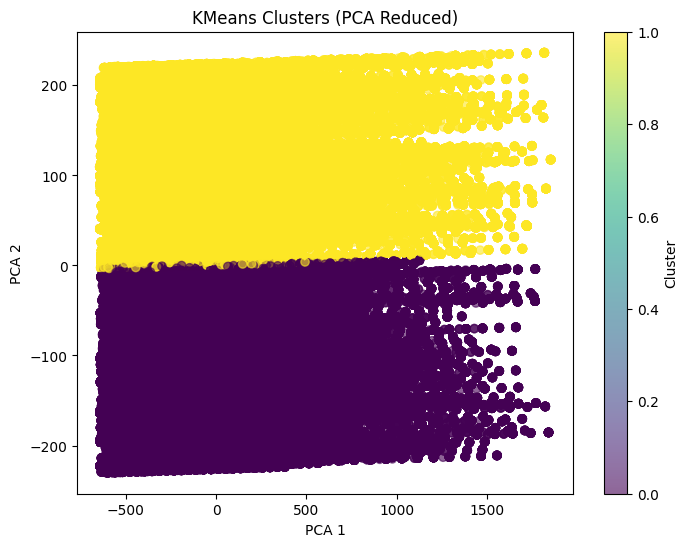

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1.toarray() if hasattr(df1, "toarray") else df1)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

The clusters are well seperated

In [41]:
centroids = model.cluster_centers_
centroids.shape, centroids

((2, 10),
 array([[ 8.60122000e+00,  1.12998592e+02,  2.55545788e-02,
          1.02662331e+00,  9.39696027e-01,  9.22147587e-01,
         -4.69955147e-02,  3.32176740e-04, -8.46549091e-04,
          1.55184747e-02],
        [ 8.62103027e+00,  3.39237860e+02, -2.57921079e-02,
          1.03211716e+00,  9.92278146e-01,  9.26486676e-01,
          4.74323367e-02, -3.35264313e-04,  8.54417740e-04,
         -1.56627185e-02]]))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



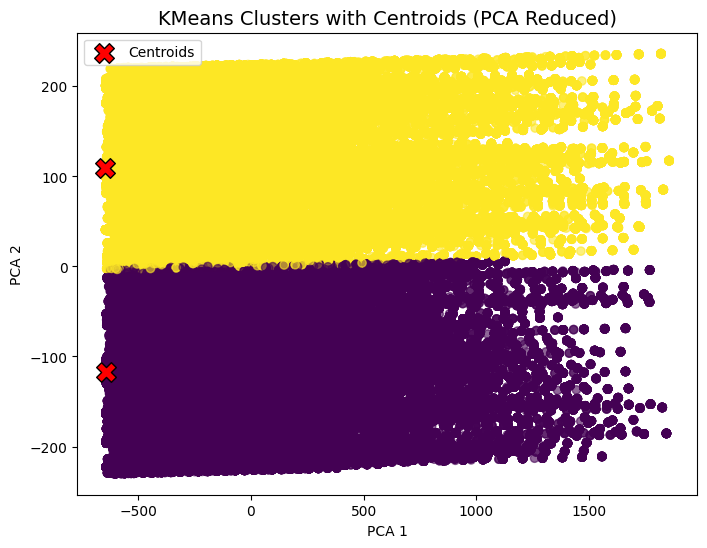

In [42]:
centroids_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)

plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="red", marker="X", s=200, edgecolor="black", label="Centroids")

plt.title("KMeans Clusters with Centroids (PCA Reduced)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

The class are seperated into 3 clusters and the centroids are well positioned which mean we are on the right track

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
ss = silhouette_score(df_scaled, model.labels_)
ss

0.6233435999886691

In [45]:
df_scaled.head()

,CityName,ProductName,price,class,resistant,IsAllergic,VitalityDays,Quantity,Discount,Revenue
0,0,392,-0.231581,0,1,2,0.384112,-0.838640,-0.469336,-0.609465
1,4,61,0.240633,2,0,1,-0.665576,-1.255310,2.650954,-0.837962
2,4,61,0.240633,2,0,1,-0.665576,-1.255310,2.650954,-0.837962
3,2,271,-1.766667,2,0,1,-0.665576,0.689149,2.650954,-1.164358
4,6,436,-0.385041,0,2,1,-0.665576,-1.116420,-0.469336,-0.811260


In [49]:
n_clusters = range(2, 13)
inertia_error = []
silhouette_scores =[]

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=30)
    model.fit(df_scaled)

    inertia_error.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, model.labels_))

print('inertia error type:', type(inertia_error))
print('inertia error length:', len(inertia_error))
print('inertia error:', inertia_error)

print('silhouette scores type:', type(silhouette_scores))
print('silhouette scores length:', len(silhouette_scores))
print('silhouette scores:', silhouette_scores)

inertia error type: <class 'list'>
inertia error length: 11
inertia error: [1078703570.9472432, 484631099.6477678, 276093638.3751404, 179486423.04283512, 126473662.45003608, 95397738.59233524, 75758426.31772576, 61029882.37099338, 52051125.678933784, 43961500.6554264, 37652723.075173125]
silhouette scores type: <class 'list'>
silhouette scores length: 11
silhouette scores: [0.6233435999886691, 0.5820397380787756, 0.5584809747899122, 0.5420911864904177, 0.5303658898949751, 0.5162423313713966, 0.5042370952810197, 0.49540114059214213, 0.4846895569817898, 0.4752132087533134, 0.4676450954457026]


In [50]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

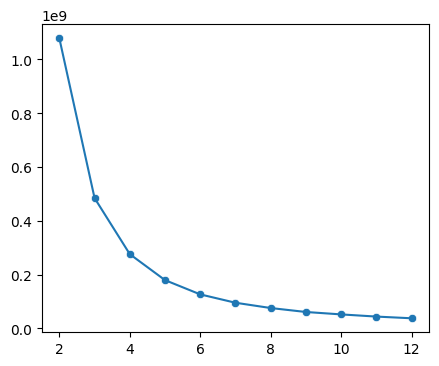

In [51]:
plt.figure(figsize=(5,4))
sns.lineplot(x=n_clusters, y=inertia_error)
sns.scatterplot(x=n_clusters, y=inertia_error)
plt.show

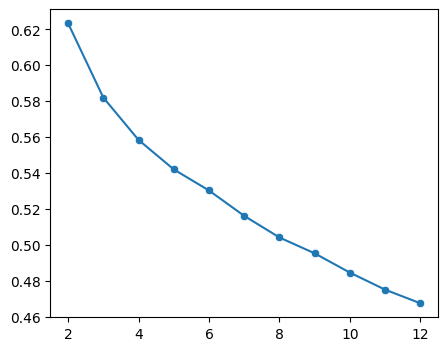

In [52]:
plt.figure(figsize=(5,4))
sns.lineplot(x=n_clusters, y=silhouette_scores)
sns.scatterplot(x=n_clusters, y=silhouette_scores)
plt.show()

In [57]:
best_model = KMeans(n_clusters=3, random_state=30)
best_model.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,30
,copy_x,True
,algorithm,'lloyd'


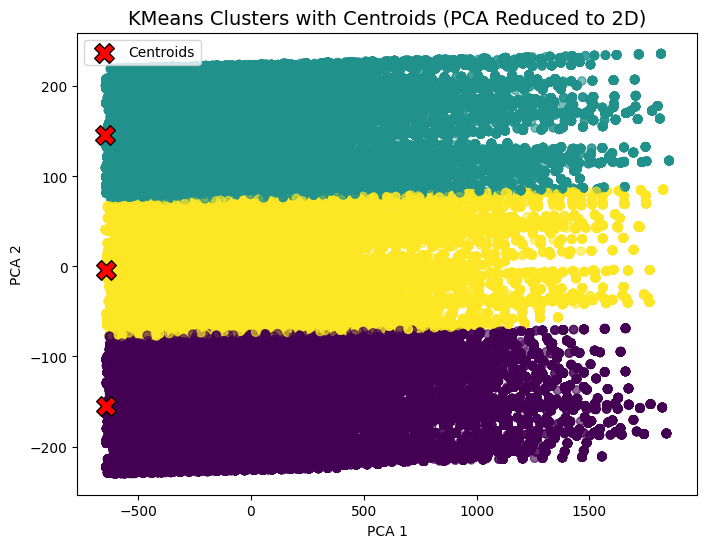

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_model.labels_, cmap="viridis", alpha=0.6)

plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="red", marker="X", s=200, edgecolor="black", label="Centroids")

plt.title("KMeans Clusters with Centroids (PCA Reduced to 2D)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [63]:
ss = silhouette_score(df_scaled, best_model.labels_)
ss

0.5820397380787756

In [67]:
xgb=df1.groupby(best_model.labels_).mean()
xgb

,CityName,ProductName,price,class,resistant,IsAllergic,VitalityDays,Quantity,Discount,Revenue
0,8.594917,74.798101,52.968315,1.019534,0.924010,0.946378,21.539675,13.064973,0.029724,670.799542
1,8.620312,376.427409,50.445813,0.961441,0.935592,0.950559,30.695435,13.036003,0.030231,639.264006
2,8.618037,225.994103,49.111108,1.106911,1.037916,0.876054,25.769083,13.013508,0.030294,618.794960


Cluster 0 spends more and mostly buys product with low vitality days.
Cluster 1 spends lesser than cluster 0 and more than cluster 2 and aims for buying products with the highest vitality days.
Cluster 2 spends the least and buys products with the vitality days more than cluster 0 and lesser than cluster 1.

More analysis will be done...

In [69]:
labels = best_model.labels_

In [70]:
df['labels'] = labels

FOR PRODUCTS

In [97]:
df0 = df[df['labels'] == 0]

df0p = df0['ProductName'].value_counts()
df0p.head(10)

ProductName
Blackberries                         645
Beef - Top Sirloin                   628
Bread - English Muffin               622
Bandage - Flexible Neon              621
Cheese - Wine                        617
Appetizer - Mini Egg Roll, Shrimp    616
Beer - Original Organic Lager        608
Cheese - Taleggio D.o.p.             601
Cheese - Victor Et Berthold          601
Chocolate - Semi Sweet, Calets       599
Name: count, dtype: int64

In [98]:
df0 = df[df['labels'] == 1]

df0p = df0['ProductName'].value_counts()
df0p.head(10)

ProductName
Wine - Crozes Hermitage E.       654
Yogurt - Blueberry, 175 Gr       637
Wine - Red, Colio Cabernet       626
Tea - Herbal Sweet Dreams        620
Scallop - St. Jaques             614
Wine - Toasted Head              610
Wine - Ej Gallo Sierra Valley    609
Whmis - Spray Bottle Trigger     608
Water - Green Tea Refresher      607
Sauerkraut                       606
Name: count, dtype: int64

In [99]:
df0 = df[df['labels'] == 2]

df0p = df0['ProductName'].value_counts()
df0p.head(10)

ProductName
Olives - Kalamata                629
Kellogs All Bran Bars            628
Hinge W Undercut                 625
Longos - Chicken Wings           618
Grapes - Red                     615
Flour - Teff                     612
Flavouring - Orange              612
Garlic - Peeled                  609
Pork - Hock And Feet Attached    609
Potatoes - Idaho 100 Count       605
Name: count, dtype: int64

What each cluster says:

Cluster 0: buys more of perishable, premium and high quality goods.
strategy: Consider pairing their most bought product with complementary goods with high class values, recomend new high class similar goods they can buy

Cluster 1: buys more of wine and goods relating to health wellness.
strategy: More of healthy or health related foods pair with same feature of goods as complement and strategies that boost healthy living

Cluster 2: buys more of household family related goods.
strategy: pairing complementary product to boost basic goods sale and recommendations on other slow moving products that are beneficial

FOR CITY

In [100]:
df0 = df[df['labels'] == 0]

df0p = df0['CityName'].value_counts()
df0p.head(10)

CityName
Lubbock         10416
Columbus         7678
Baltimore        7410
New Orleans      6932
Tucson           3961
Indianapolis     3904
Las Vegas        3764
Anaheim          3749
Little Rock      3733
Hialeah          3710
Name: count, dtype: int64

In [101]:
df0 = df[df['labels'] == 1]

df0p = df0['CityName'].value_counts()
df0p.head(10)

CityName
Lubbock         10566
Columbus         7814
Baltimore        7506
New Orleans      6864
Tucson           3917
Indianapolis     3751
Little Rock      3726
Jackson          3722
Albuquerque      3714
Las Vegas        3699
Name: count, dtype: int64

In [102]:
df0 = df[df['labels'] == 2]

df0p = df0['CityName'].value_counts()
df0p.head(10)

CityName
Lubbock         10557
Columbus         7938
Baltimore        7148
New Orleans      6776
Tucson           3887
Indianapolis     3876
Jackson          3834
Hialeah          3803
Las Vegas        3794
Rochester        3729
Name: count, dtype: int64

The clusters is not really determined by the city, all customers in the different cities belongs to their existing cluster

Below is a heatmap that covers customers distribution in each clusters in different cities

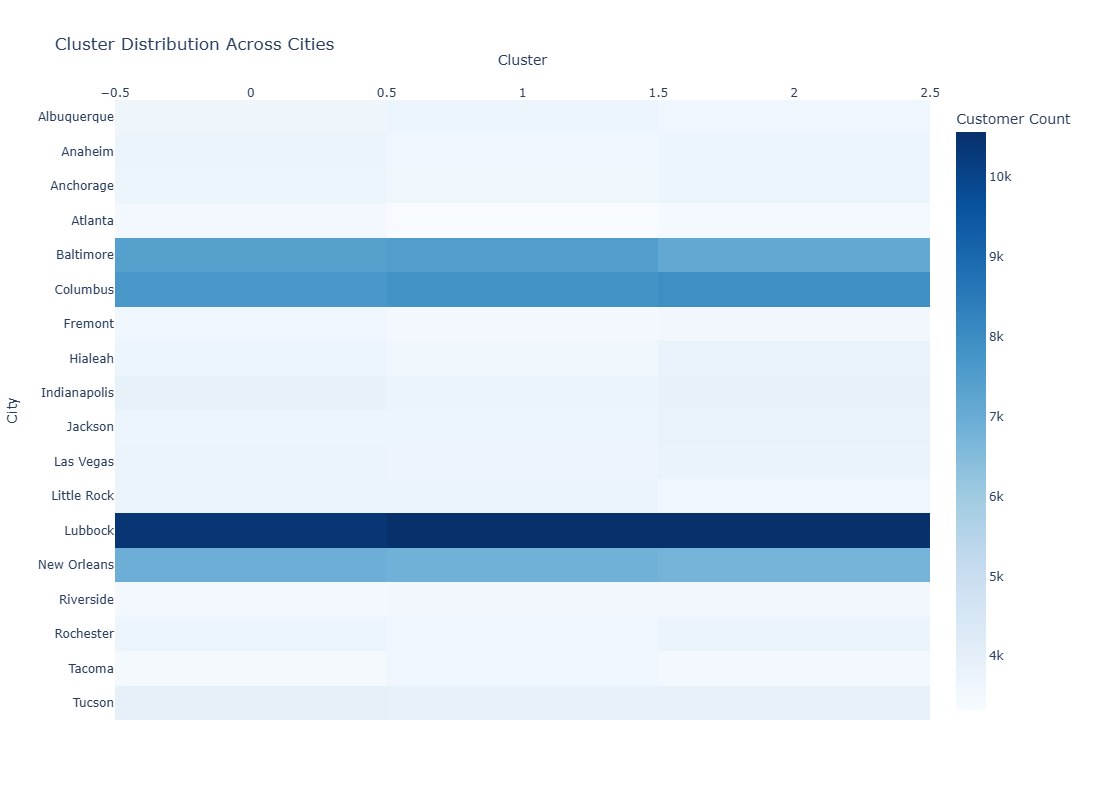

In [105]:
city_cluster_counts = (
    df.groupby(["CityName", "labels"])
    .size()
    .reset_index(name="Count")
)


heatmap_data = city_cluster_counts.pivot(index="CityName", columns="labels", values="Count").fillna(0)


fig = px.imshow(
    heatmap_data,
    labels=dict(x="Cluster", y="City", color="Customer Count"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale="Blues",
    title="Cluster Distribution Across Cities",
    height=800
)

fig.update_xaxes(side="top")
fig.show()